In [1]:
import pandas

In [61]:
df = pandas.read_csv('isl_wise_train_detail_03082015_v1.csv')

In [62]:
df.head()

,Train No.,train Name,islno,station Code,Station Name,Arrival time,Departure time,Distance,Source Station Code,source Station Name,Destination station Code,Destination Station Name
0,'00851',BNC SUVIDHA SPL,1,BBS,BHUBANESWAR,'00:00:00','22:50:00',0,BBS,BHUBANESWAR,BNC,BANGALORE CANT
1,'00851',BNC SUVIDHA SPL,2,BAM,BRAHMAPUR,'01:10:00','01:12:00',166,BBS,BHUBANESWAR,BNC,BANGALORE CANT
2,'00851',BNC SUVIDHA SPL,3,VSKP,VISAKHAPATNAM,'05:10:00','05:30:00',443,BBS,BHUBANESWAR,BNC,BANGALORE CANT
3,'00851',BNC SUVIDHA SPL,4,BZA,VIJAYAWADA JN,'11:10:00','11:20:00',793,BBS,BHUBANESWAR,BNC,BANGALORE CANT
4,'00851',BNC SUVIDHA SPL,5,RU,RENIGUNTA JN,'16:42:00','16:52:00',1169,BBS,BHUBANESWAR,BNC,BANGALORE CANT


In [7]:
trains = list(set(df['Train No.']))

In [5]:
len(trains)

2810

In [17]:
travel_distance_list = []
for train in trains:
    truncated_df = df[df['Train No.']==train]
    travel_distance_list.append(truncated_df.iloc[-1]['Distance'])

In [18]:
import matplotlib.pyplot as plt

In [19]:
%matplotlib inline

(array([ 638.,  839.,  363.,  385.,  290.,  148.,   85.,   41.,   19.,    2.]),
 array([   14. ,   439.9,   865.8,  1291.7,  1717.6,  2143.5,  2569.4,
         2995.3,  3421.2,  3847.1,  4273. ]),
 <a list of 10 Patch objects>)

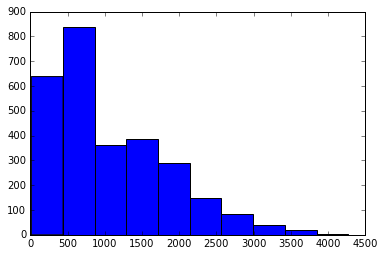

In [20]:
plt.hist(travel_distance_list)

In [21]:
source_stations_list = list(set(df['Source Station Code']))

In [22]:
len(source_stations_list)

357

In [23]:
stations_list = list(set(df['station Code']))

In [24]:
len(stations_list)

4344

need to figure out how to understand and visualize trains that have travel time >24 hrs
---

this is a little weird. something must be going wrong with my analysis
---

In [136]:
travel_durations_list = []
for train in trains:
    truncated_df = df[df['Train No.']==train]
    
    start = int(truncated_df.iloc[0]['Arrival time'].strip("''").split(':')[0])
    end = int(truncated_df.iloc[-1]['Arrival time'].strip("''").split(':')[0])
    
    times = [int(truncated_df.iloc[i]['Arrival time'].strip("''").split(':')[0]) for i in range(len(truncated_df))]
    time_diffs = [times[i+1]-times[i] for i in range(len(times)-1)]
    
    for time_diff in time_diffs:
        if abs(time_diff) != time_diff:
            end += 24
    
    travel_durations_list.append(end-start)

In [140]:
trunc_travel_durations_list = sorted(travel_durations_list, reverse=True)[20:]

(array([  371.,   628.,  1106.,   390.,   185.,    62.,    12.,     7.,
            3.,     9.,     2.,     3.,     0.,     4.,     2.,     4.,
            0.,     3.,     9.,    10.]),
 array([   4. ,   16.8,   29.6,   42.4,   55.2,   68. ,   80.8,   93.6,
         106.4,  119.2,  132. ,  144.8,  157.6,  170.4,  183.2,  196. ,
         208.8,  221.6,  234.4,  247.2,  260. ]),
 <a list of 20 Patch objects>)

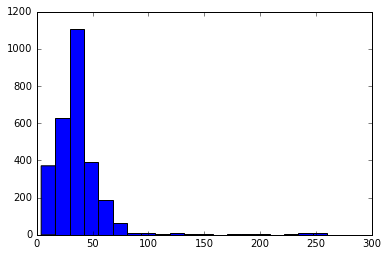

In [135]:
plt.hist(travel_durations_list, bins=20)

(array([  729.,  1571.,   414.,    40.,    10.,    10.,     4.,     4.,
            5.,     3.]),
 array([   4. ,   26.4,   48.8,   71.2,   93.6,  116. ,  138.4,  160.8,
         183.2,  205.6,  228. ]),
 <a list of 10 Patch objects>)

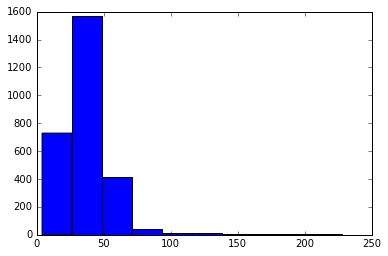

In [141]:
plt.hist(trunc_travel_durations_list)

In [70]:
grouped_df = df.groupby(by=[u'Train No.'], as_index=False)

this is interesting. shows how many stations there are on a route
---

In [71]:
df_counts = grouped_df.count()

In [75]:
stations_en_route = []
for train in trains:
    stations_en_route.append(df_counts[df_counts['Train No.']==train].iloc[0]['train Name'])

(array([  836.,  1065.,   512.,   219.,    83.,    40.,    29.,    16.,
            6.,     4.]),
 array([   2. ,   14.6,   27.2,   39.8,   52.4,   65. ,   77.6,   90.2,
         102.8,  115.4,  128. ]),
 <a list of 10 Patch objects>)

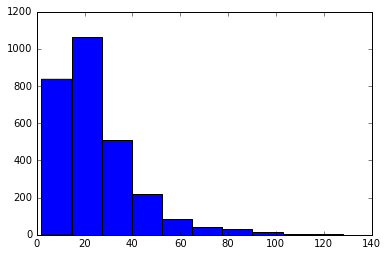

In [76]:
plt.hist(stations_en_route)

In [77]:
popular_source_df = grouped_df['Source Station Code']

In [78]:
popular_source_df

number of trains that have the same source station
---

In [83]:
source_stations_list = []
for name, group in grouped_df:
    source_stations_list.append(group.iloc[0]['Source Station Code'])

In [84]:
from collections import Counter

In [86]:
source_stations_counts = Counter(source_stations_list).items()

In [92]:
source_stations_counts[:5]

[('SSPN', 2), ('CDG ', 18), ('RMR ', 6), ('MJ  ', 1), ('UBL ', 16)]

In [101]:
sorted_source_stations_count = sorted(source_stations_counts, key=lambda x : x[1], reverse=True)

In [105]:
sorted_source_stations_count[:10]

[('HWH ', 102),
 ('NDLS', 85),
 ('MAS ', 69),
 ('LTT ', 63),
 ('CSTM', 50),
 ('YPR ', 49),
 ('NZM ', 48),
 ('SC  ', 46),
 ('PUNE', 46),
 ('ADI ', 44)]

In [107]:
'042'.startswith('0')

True